# Seminar 3

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Numpy-Array-Types" data-toc-modified-id="Numpy-Array-Types-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Numpy Array Types</a></span></li><li><span><a href="#Loading-JPEG-images" data-toc-modified-id="Loading-JPEG-images-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Loading JPEG images</a></span></li><li><span><a href="#Loading-RAW-Files" data-toc-modified-id="Loading-RAW-Files-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Loading RAW Files</a></span></li><li><span><a href="#Loading-Fits-files" data-toc-modified-id="Loading-Fits-files-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Loading Fits files</a></span><ul class="toc-item"><li><span><a href="#Access-and-Evaluate-Fits-Headers" data-toc-modified-id="Access-and-Evaluate-Fits-Headers-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Access and Evaluate Fits Headers</a></span></li></ul></li></ul></div>

## Numpy Array Types 

In [1]:
import numpy as np
from matplotlib import pylab as plt

Float Arrays


In [2]:
A = np.zeros((4,5,3)).astype(float)

In [3]:
A-1

array([[[-1., -1., -1.],
        [-1., -1., -1.],
        [-1., -1., -1.],
        [-1., -1., -1.],
        [-1., -1., -1.]],

       [[-1., -1., -1.],
        [-1., -1., -1.],
        [-1., -1., -1.],
        [-1., -1., -1.],
        [-1., -1., -1.]],

       [[-1., -1., -1.],
        [-1., -1., -1.],
        [-1., -1., -1.],
        [-1., -1., -1.],
        [-1., -1., -1.]],

       [[-1., -1., -1.],
        [-1., -1., -1.],
        [-1., -1., -1.],
        [-1., -1., -1.],
        [-1., -1., -1.]]])

8bit integer arrays

In [4]:
B = np.zeros((4,5,3)).astype("uint8")

In [5]:
(B-6).astype("uint8")

array([[[250, 250, 250],
        [250, 250, 250],
        [250, 250, 250],
        [250, 250, 250],
        [250, 250, 250]],

       [[250, 250, 250],
        [250, 250, 250],
        [250, 250, 250],
        [250, 250, 250],
        [250, 250, 250]],

       [[250, 250, 250],
        [250, 250, 250],
        [250, 250, 250],
        [250, 250, 250],
        [250, 250, 250]],

       [[250, 250, 250],
        [250, 250, 250],
        [250, 250, 250],
        [250, 250, 250],
        [250, 250, 250]]], dtype=uint8)

## Loading JPEG images

In [6]:
path = "/data1/sbaar/PICTURES/" 

In [7]:
ls ../PICTURES/JPEG/

1.jpg*  2.jpg*


In [8]:
image1 = plt.imread(path+"JPEG/1.jpg")

In [9]:
image1.shape

(1536, 2759, 3)

In [10]:
plt.figure(figsize = (12,8))
plt.imshow(image1)
plt.show()

## Loading RAW Files

Raw files can have a higher color and brightness range than png and jpeg files. In this case the depth of the raw file is 16bit.

In [11]:
ls ../PICTURES/RAWS/

DSC00459.ARW*  DSC00460.JPG*  DSC00462.ARW*  DSC00463.JPG*
DSC00459.JPG*  DSC00461.ARW*  DSC00462.JPG*  DSC00464.ARW*
DSC00460.ARW*  DSC00461.JPG*  DSC00463.ARW*  DSC00464.JPG*


In [12]:
import rawpy

In [13]:
image2 = rawpy.imread(path+"RAWS/DSC00462.ARW").raw_image_visible

In [14]:
image2.shape

(2848, 4256)

Further, unlike jpeg files, RAW files are in general not pre-processed by the camera. Therefore, noise reduction, whitebalancing and demosaicing have not been performed.

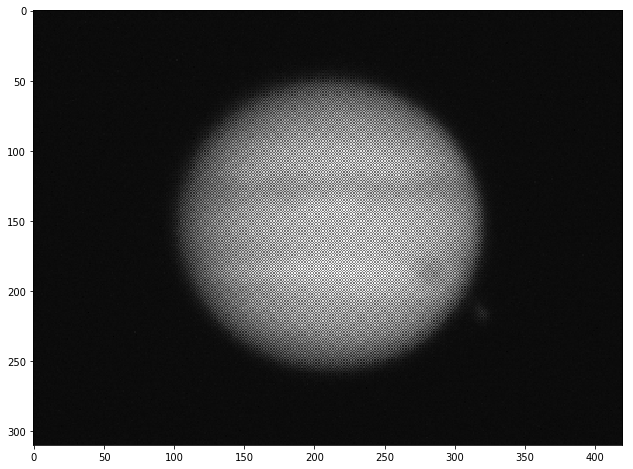

In [15]:
plt.figure(figsize = (12,8))
plt.imshow(image2[920:1230,2000:2420], cmap = "Greys_r")
plt.show()

We can obtain the individual color frames (1 Red, 2 Green, 1 Blue) by debayering.

In [16]:
R  = image2[1::2,1::2]
G1 = image2[1::2,0::2]
G2 = image2[0::2,1::2]
B  = image2[0::2,0::2]

G = (G1+G2)/2

RGB = np.dstack([R,G,B])

In [17]:
print image2.shape
print RGB.shape

(2848, 4256)
(1424, 2128, 3)


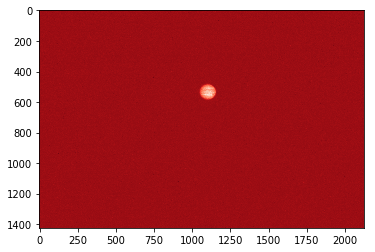

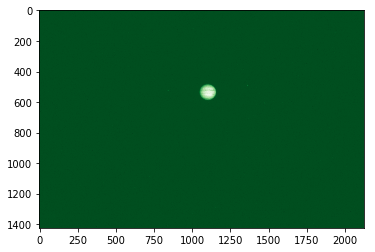

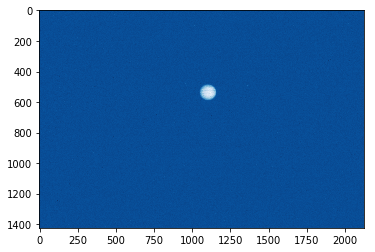

In [18]:
plt.imshow(R, cmap = "Reds_r")
plt.show()
plt.imshow(G, cmap = "Greens_r")
plt.show()
plt.imshow(B, cmap = "Blues_r" )
plt.show()

In [19]:
RGB.dtype

dtype('uint16')

## Loading Fits files

In [20]:
from astropy.io import fits

In [21]:
ls /data1/sbaar/60cm/150827raw/20150827.00000001.FIT

/data1/sbaar/60cm/150827raw/20150827.00000001.FIT*


In [22]:
path = "/data1/sbaar/60cm/150827raw/20150827.00000001.FIT"
FITSimage = fits.open(path);

### Access and Evaluate Fits Headers 

In [23]:
if FITSimage[0].header["IMAGETYP"] == 'Light Frame':
    print "is Light Frame"
else:
    print "not Light Frame"

is Light Frame


In [24]:
gpath = "/data1/sbaar/60cm/150827raw/"

We can use glob to get a list of files within a directory. 

In [25]:
from glob import glob

In [26]:
FILElist = np.array(glob(gpath+"*.FIT"))

It is useful to sort the files by name as follows:

In [27]:
FILElist = sorted(FILElist)
FILElist

['/data1/sbaar/60cm/150827raw/20150827.00000001.FIT',
 '/data1/sbaar/60cm/150827raw/20150827.00000002.FIT',
 '/data1/sbaar/60cm/150827raw/20150827.00000003.FIT',
 '/data1/sbaar/60cm/150827raw/20150827.00000004.FIT',
 '/data1/sbaar/60cm/150827raw/20150827.00000005.FIT',
 '/data1/sbaar/60cm/150827raw/20150827.00000006.FIT',
 '/data1/sbaar/60cm/150827raw/20150827.00000007.FIT',
 '/data1/sbaar/60cm/150827raw/20150827.00000008.FIT',
 '/data1/sbaar/60cm/150827raw/20150827.00000009.FIT',
 '/data1/sbaar/60cm/150827raw/20150827.00000010.FIT',
 '/data1/sbaar/60cm/150827raw/20150827.00000011.FIT',
 '/data1/sbaar/60cm/150827raw/20150827.00000012.DARK.FIT',
 '/data1/sbaar/60cm/150827raw/20150827.00000013.DARK.FIT',
 '/data1/sbaar/60cm/150827raw/20150827.00000014.DARK.FIT',
 '/data1/sbaar/60cm/150827raw/20150827.00000015.DARK.FIT',
 '/data1/sbaar/60cm/150827raw/20150827.00000016.DARK.FIT',
 '/data1/sbaar/60cm/150827raw/20150827.00000017.DARK.FIT',
 '/data1/sbaar/60cm/150827raw/20150827.00000018.DARK

Let's inspect all fits headers to create a list of Dark files within the directory.

In [28]:
ITYPE = []
for i in FILElist[:50]:
    filetype =  fits.open(i)[0].header["IMAGETYP"]
    ITYPE.append(filetype)
ITYPE = np.asarray(ITYPE)    

In [29]:
DARKindex = np.where(ITYPE == 'Dark Frame')

In [30]:
DARKindex

(array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
        28, 29, 30, 31, 32, 33, 34, 35]),)

In [31]:
np.array(FILElist)[DARKindex]

array(['/data1/sbaar/60cm/150827raw/20150827.00000012.DARK.FIT',
       '/data1/sbaar/60cm/150827raw/20150827.00000013.DARK.FIT',
       '/data1/sbaar/60cm/150827raw/20150827.00000014.DARK.FIT',
       '/data1/sbaar/60cm/150827raw/20150827.00000015.DARK.FIT',
       '/data1/sbaar/60cm/150827raw/20150827.00000016.DARK.FIT',
       '/data1/sbaar/60cm/150827raw/20150827.00000017.DARK.FIT',
       '/data1/sbaar/60cm/150827raw/20150827.00000018.DARK.FIT',
       '/data1/sbaar/60cm/150827raw/20150827.00000019.DARK.FIT',
       '/data1/sbaar/60cm/150827raw/20150827.00000020.DARK.FIT',
       '/data1/sbaar/60cm/150827raw/20150827.00000021.DARK.FIT',
       '/data1/sbaar/60cm/150827raw/20150827.00000022.DARK.FIT',
       '/data1/sbaar/60cm/150827raw/20150827.00000023.DARK.FIT',
       '/data1/sbaar/60cm/150827raw/20150827.00000024.DARK.FIT',
       '/data1/sbaar/60cm/150827raw/20150827.00000025.DARK.FIT',
       '/data1/sbaar/60cm/150827raw/20150827.00000026.DARK.FIT',
       '/data1/sbaar/60cm